# Collatz conjecture


The Collatz conjecture is a conjecture in mathematics named after Lothar Collatz. It concerns a sequence defined as follows: 

* Start with any positive integer $n$.

* Then each term is obtained from the previous term as follows: 

    - If the previous term is even, the next term is one half the previous term. 
    - Otherwise, the next term is 3 times the previous term plus 1.

The conjecture is that **no matter what value of $n$, the sequence will always reach 1.**

In modular arithmetic notation, define the function $f$ as follows:

$$ f(n)={\begin{cases}n/2&{\text{if }}n\equiv 0{\pmod {2}}\\3n+1&{\text{if }}n\equiv 1{\pmod {2}}.\end{cases}} $$

Now form a sequence by performing this operation repeatedly, beginning with any positive integer, and taking the result at each step as the input at the next.

>Mathematics may not be ready for such problems.
<div class=col-md-8 style="text-align: right">_Paul Erdős_</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [2]:
def is_odd(num):
    return num % 2 != 0

def colatz(n):
    seq = [n]
    while seq[-1] != 1:
        if is_odd(seq[-1]):
            seq.append(3*seq[-1]+1)
        else:
            seq.append(seq[-1]//2)

    return seq        

Generate colatz sequences:

In [3]:
nrange = np.random.randint(20000,3000000, 100000)
colatz_l = [colatz(x) for x in nrange]

In [4]:
# length of each sequence
lengs = [len(x) for x in colatz_l]

In [ ]:
plt.hist(lengs, bins= 1000)
plt.title('colatz lengths')

In [6]:
rev_colatz_l = [list(reversed(x)) for x in colatz_l]

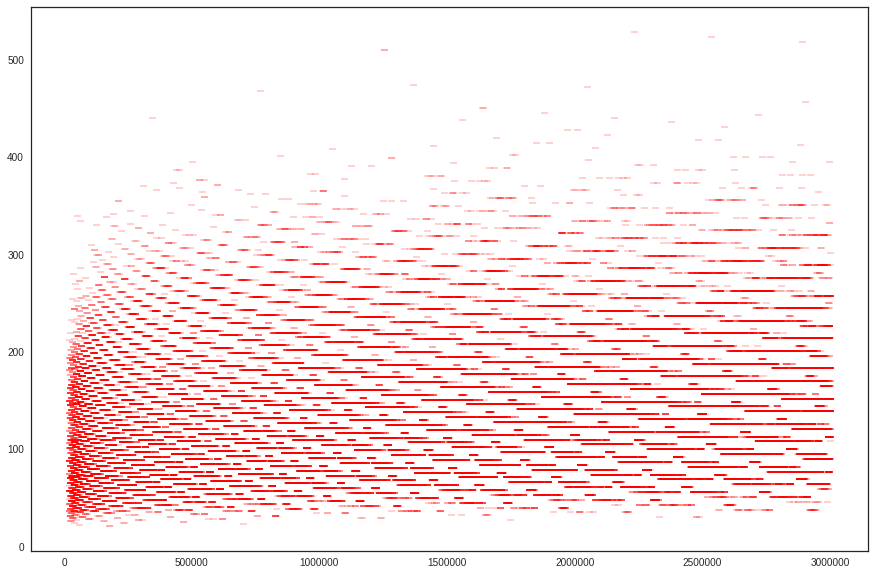

In [7]:
plt.figure(figsize=(15, 10))
plt.scatter(nrange, lengs, marker='_', c='r', alpha = 0.2)

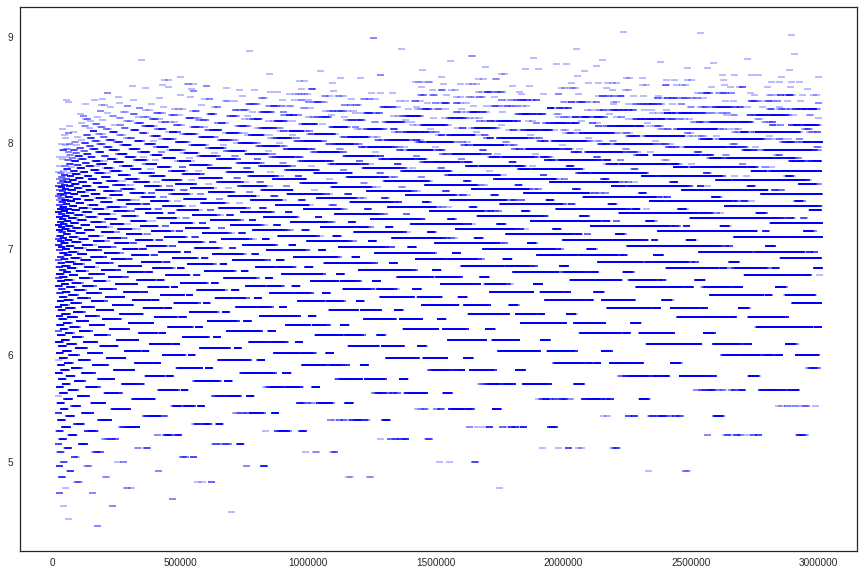

In [8]:
plt.figure(figsize=(15, 10))
plt.scatter(nrange, np.log2(lengs), marker='_', c='c0', alpha = 0.3)

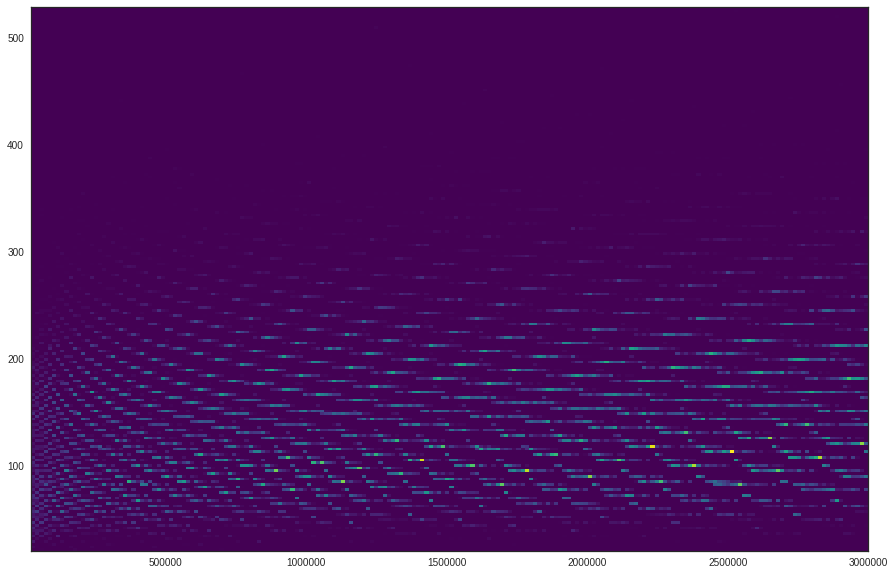

In [29]:
plt.figure(figsize=(15, 10))
plt.hist2d(nrange, lengs, bins=200, cmap='viridis');

## Give an angle to every number 

* +$\alpha$ for even 
* -$\alpha$ for odd

In [9]:
def appendang(seq):
    angles = []
    for i in seq:
        if is_odd(i):
            angles.append(-np.pi/50)
        else:
            angles.append(np.pi/50)
    return angles

In [10]:
angles_l = [appendang(i) for i in colatz_l]

In [11]:
cumsum_angles = [np.cumsum(i) for i in angles_l]

In [12]:
rev_cumsum = [list(reversed(x)) for x in cumsum_angles]

In [13]:
leng_arr = [np.arange(x) for x in lengs]

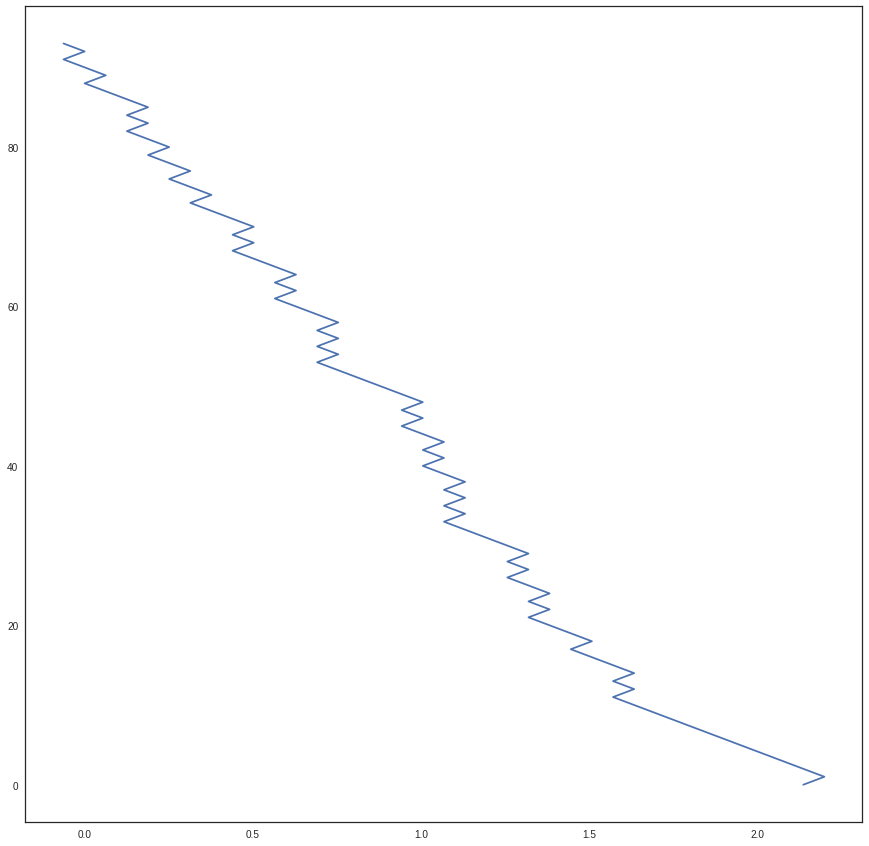

In [31]:
plt.figure(figsize=(15, 15))
ax = plt.subplot(111)
ax.plot(rev_cumsum[0], leng_arr[0])

``` R
drawCollatz <- function(n, x1, y1, rad1) {
  startx[[n]] <<- x1
  starty[[n]] <<- y1
  if (n %% 2 == 0) {
    rad2 <- rad1 + evenRadChange
  } else {
    rad2 <- rad1 + oddRadChange
  }
  endx[[n]] <<- x2 <- x1 + cos(rad2)
  endy[[n]] <<- y2 <- y1 + sin(rad2)
  
  nextValue <- which(l == n)
  if (length(nextValue) > 0) {
    for (i in 1:length(nextValue)) {
      drawCollatz(nextValue[[i]], x2, y2, rad2)
    }
  }
}

drawCollatz(2, 0, 0, 0)

plot.new()
plot.window(xlim=c(min(endx),max(endx)), ylim=c(min(endy),max(endy)))
```

In [40]:
bigNumber = 5000
oddDegChange = 1.2
evenDegChange = -0.54

oddradchange = oddDegChange * np.pi / 180
evenradchange = evenDegChange * np.pi / 180


l = weight = np.zeros(5000)

startx = starty = endx = endy = np.zeros(5000)

def draw_collatz(n,x,y,rad1):
    startx[n] = x
    starty[n] = y
    
    if is_odd(n):
        rad2 = rad1 + oddradchange
    else:
        rad2 = rad1 + evenradchange
    
    endx[n] = x2 = x + np.cos(rad2)
    endy[n] = y2 = y + np.sin(rad2)
    
    
    nextval = np.where(l == n)
    if len(nextval) > 0:
        for i in np.arange(len(nextval)):
            draw_collatz(nextval[i], x2, y2, rad2)
            

In [41]:
draw_collatz(2,0,0,0)

/home/biel/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


RuntimeError: maximum recursion depth exceeded in __instancecheck__

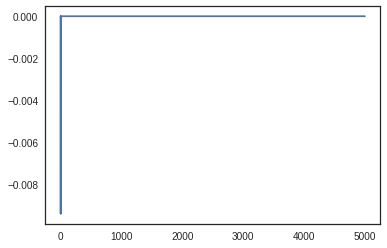

In [48]:
plt.plot(endy)